In [1]:
import tensorflow as tf
from tensorflow import keras
import datetime
from datetime import datetime

In [2]:
# Define the model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [3]:
(train_images, train_labels), _ = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0


In [4]:
# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model.fit(
    train_images,
    train_labels,
    batch_size=64,
    epochs=5,
    callbacks=[tensorboard_callback])


Epoch 1/5
938/938 [==============================] - 8s 5ms/step - loss: 0.7018 - accuracy: 0.7596
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.4903 - accuracy: 0.8306
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.4491 - accuracy: 0.8401
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.4288 - accuracy: 0.8486
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.4160 - accuracy: 0.8501


In [6]:
from torch.utils.tensorboard import SummaryWriter
import torch
from torch import nn

In [8]:
import torch
from torch import nn
from d2l import torch as d2l


def corr2d(X, K):  # @save
    """计算二维互相关运算"""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y


In [9]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias


In [10]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [11]:
import torch
from torch import nn


# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return Y.reshape(Y.shape[2:])


# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape


torch.Size([8, 8])

In [14]:
import tensorflow as tf


# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = tf.reshape(X, (1, ) + X.shape + (1, ))
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return tf.reshape(Y, Y.shape[1:3])


# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = tf.keras.layers.Conv2D(1, kernel_size=3, padding='same')
X = tf.random.uniform(shape=(8, 8))
comp_conv2d(conv2d, X).shape


TensorShape([8, 8])

In [19]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(
    filters=12, kernel_size=3, activation='relu', input_shape=input_shape[1:], padding='same')(x)
print(y.shape)


(4, 28, 28, 12)


In [17]:
input_shape[1:]

(28, 28, 3)

In [35]:
from datetime import datetime
import tensorflow as tf
import numpy as np

logdir = "logs/train_data/" + datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
file_writer = tf.summary.create_file_writer(logdir)

# X = torch.zeros((160, 160))
# X[:, 2:60] = 255


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
    fashion_mnist.load_data()

# img = np.reshape(X, (-1, 160, 160, 1))

# Reshape the image for the Summary API.
img = np.reshape(train_images[0], (-1, 28, 28, 1))
print(img.shape)
with file_writer.as_default():
  tf.summary.image("Training data", img, step=0)


(1, 28, 28, 1)


In [40]:
x = np.random.rand(28, 28)
img = np.reshape(x, (-1, 28, 28, 1))

with file_writer.as_default():
  tf.summary.image("Training data", img, step=0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


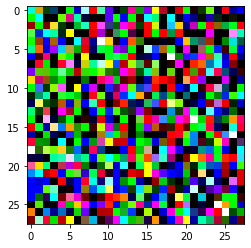

In [85]:
import matplotlib.pyplot as plt

img = np.random.rand(28, 28, 3)



img1 = tf.random.normal([28, 28, 3])
img1[:, 5:,:]
plt.figure()
plt.imshow(img1)

In [67]:
print(tf.config.list_physical_devices("GPU"))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [80]:
a = tf.random.normal([2, 2])
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.2914293 ,  1.5604516 ],
       [ 0.46376225,  1.6291747 ]], dtype=float32)>

In [3]:
%tensorboard
import tensorflow as tf

logdir = "./tb/"
writer = tf.summary.create_file_writer(logdir)

steps = 1000
with writer.as_default():  # or call writer.set_as_default() before the loop.
  for i in range(steps):
    step = i + 1
    # Calculate loss with your real train function.
    loss = 1 - 0.001 * step
    if step % 10 == 0:
      tf.summary.scalar('loss', loss, step=step)

In [5]:
test_summary_writer = tf.summary.create_file_writer('test/logdir')
with test_summary_writer.as_default():
    tf.summary.scalar('loss', 0.345, step=1, description='123')
    tf.summary.scalar('loss', 0.234, step=2)
    tf.summary.scalar('loss', 0.123, step=3)


In [6]:
import os

print(os.getcwd())

d:\vscodespace\violet712.github.io\tst


In [7]:
print(os.listdir())

['data', 'DQN.ipynb', 'logs', 'reinforcement_q_learning (1).ipynb', 'tb', 'tensorboard_test.ipynb', 'test', 'tst.ipynb']


In [1]:
import tensorflow as tf
from datetime import datetime

# The function to be traced.


@tf.function
def my_func(x, y):
  # A simple hand-rolled layer.
  return tf.nn.relu(tf.matmul(x, y))


# Set up logging.
stamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
logdir = 'logs/func/%s' % stamp
writer = tf.summary.create_file_writer(logdir)

# Sample data for your function.
x = tf.random.uniform((3, 3))
y = tf.random.uniform((3, 3))

# Bracket the function call with
# tf.summary.trace_on() and tf.summary.trace_export().
tf.summary.trace_on(graph=True, profiler=True)
# Call only one tf.function when tracing.
z = my_func(x, y)
with writer.as_default():
  tf.summary.trace_export(
      name="my_func_trace",
      step=0,
      profiler_outdir=logdir)


Instructions for updating:
use `tf.profiler.experimental.start` instead.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.
Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.


In [ ]:
v = tf.Variable(1)


@tf.function
def f(x):
  ta = tf.TensorArray(tf.int32, size=0, dynamic_size=True)
  for i in tf.range(x):
    v.assign_add(i)
    ta = ta.write(i, v)
  return ta.stack()


stamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
logdir = 'logs/func/%s' % stamp
writer = tf.summary.create_file_writer(logdir)


tf.summary.trace_on(graph=True)
print(f(5))
with writer.as_default() as writer:
  tf.summary.trace_export(name='func_trace', step=0)


In [5]:
ta = tf.TensorArray(tf.float32, size=0, dynamic_size=True,
                    clear_after_read=False)
ta = ta.write(0, 10)
ta = ta.write(1, 20)
ta = ta.write(2, 30)

ta.read(0)

ta.read(1)

ta.read(2)

ta.stack()


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([10., 20., 30.], dtype=float32)>

In [6]:
ta.read(0)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [3]:
import tensorflow as tf

ta = tf.TensorArray(tf.float32, size=0, dynamic_size=True)
ta = ta.unstack([0.0, 1.0])

In [1]:
import tensorflow as tf

print(tf.math.log([[0.5, 0.5]]))

tf.Tensor([[-0.6931472 -0.6931472]], shape=(1, 2), dtype=float32)


In [31]:
samples = tf.random.categorical(
    [[0.1, 0.0, 0.5, 1.0]], 1)
print(samples)

tf.Tensor([[0]], shape=(1, 1), dtype=int64)


In [33]:
samples = tf.random.categorical(tf.math.log([[0.5, 0.5]]), 5)
print(samples)

tf.Tensor([[0 0 0 1 0]], shape=(1, 5), dtype=int64)


In [41]:
a = tf.Variable(1)
print(a)
a = tf.expand_dims(a, axis=0)

print(a)

a = tf.expand_dims(a, axis=0).shape.as_list()

print(a)


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>
tf.Tensor([1], shape=(1,), dtype=int32)
[1, 1]
